In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

from PIL import Image, ImageOps
import cv2
from skimage.io import imread
from skimage.color import rgb2lab, deltaE_cie76

In [45]:
# loading dataset
labels = pd.read_csv('../Project/input/labels.csv')
labels.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


## 48x48 pixeles képek

In [58]:
# loading training images
data_img = []
for img_name in tqdm(labels['id']):
    image_path = '../Project/input/pictures/' + str(img_name) + '.tif'
    img = cv2.imread(image_path)
    img = img[24:72, 24:72]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')
    img /= 255.0
    data_img.append(img)
    
data_x = np.array(data_img)
data_y = labels['label'].values
data_x.shape, data_y.shape

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 795.42it/s]


((1000, 48, 48, 3), (1000,))

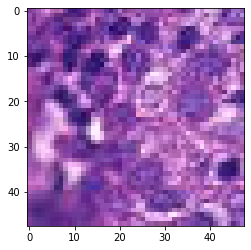

In [59]:
# visualizing image
plt.imshow(data_x[17])

In [60]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 42)

In [61]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [62]:
#create/build the model
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 46, 46, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)         

In [64]:
#train the model
model.fit(train_x, train_y, steps_per_epoch=8, epochs=15, verbose=1, validation_split=0.1)

Epoch 1/15
8/8 [==============================] - 3s 329ms/step - loss: 0.6994 - accuracy: 0.5423 - val_loss: 0.6804 - val_accuracy: 0.6418
Epoch 2/15
8/8 [==============================] - 2s 221ms/step - loss: 0.6787 - accuracy: 0.5672 - val_loss: 0.6887 - val_accuracy: 0.6866
Epoch 3/15
8/8 [==============================] - 2s 229ms/step - loss: 0.6702 - accuracy: 0.5804 - val_loss: 0.6661 - val_accuracy: 0.6716
Epoch 4/15
8/8 [==============================] - 2s 209ms/step - loss: 0.6492 - accuracy: 0.6269 - val_loss: 0.6391 - val_accuracy: 0.6716
Epoch 5/15
8/8 [==============================] - 2s 207ms/step - loss: 0.6541 - accuracy: 0.6302 - val_loss: 0.6259 - val_accuracy: 0.6567
Epoch 6/15
8/8 [==============================] - 2s 216ms/step - loss: 0.6380 - accuracy: 0.6534 - val_loss: 0.6422 - val_accuracy: 0.7313
Epoch 7/15
8/8 [==============================] - 2s 216ms/step - loss: 0.6340 - accuracy: 0.6318 - val_loss: 0.6737 - val_accuracy: 0.6418
Epoch 8/15
8/8 [====

In [65]:
#test the model
score = model.evaluate(test_x, test_y, verbose=1)
score[1]

11/11 [==============================] - 0s 26ms/step - loss: 0.5657 - accuracy: 0.7879


0.7878788113594055

In [66]:
pred = model.predict(test_x)

In [67]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred, pos_label=1, sample_weight=None)

(0.0, 1.0)

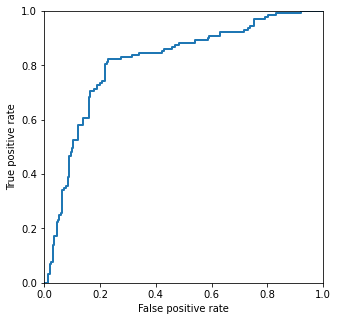

In [68]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [69]:
metrics.roc_auc_score(test_y, pred)

0.8104439045084655

## 96x96 pixeles képek

In [71]:
# loading training images
data_img = []
for img_name in tqdm(labels['id']):
    image_path = '../Project/input/pictures/' + str(img_name) + '.tif'
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype('float32')
    img /= 255.0
    data_img.append(img)
    
data_x = np.array(data_img)
data_y = labels['label'].values
data_x.shape, data_y.shape

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 668.36it/s]


((1000, 96, 96, 3), (1000,))

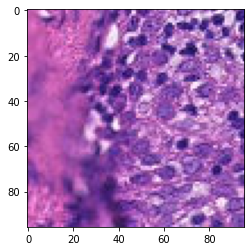

In [72]:
# visualizing image
plt.imshow(data_x[17])

In [73]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 42)

In [74]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [75]:
#create/build the model
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(train_x.shape[1], train_x.shape[2], train_x.shape[3]), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 64)       

In [ ]:
#train the model
model.fit(train_x, train_y, steps_per_epoch=8, epochs=15, verbose=1, validation_split=0.1)

Epoch 1/15
8/8 [==============================] - 8s 967ms/step - loss: 0.8796 - accuracy: 0.5406 - val_loss: 0.6816 - val_accuracy: 0.6418
Epoch 2/15
6/8 [=====================>........] - ETA: 1s - loss: 0.6822 - accuracy: 0.5658

In [ ]:
#test the model
score = model.evaluate(test_x, test_y, verbose=1)
score[1]

In [ ]:
pred = model.predict(test_x)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred, pos_label=1, sample_weight=None)

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,linewidth=2.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
metrics.roc_auc_score(test_y, pred)